In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tikzplotlib
from scipy.stats import linregress
from scipy.optimize import curve_fit
import os
from numpy import arange

import numpy as np, scipy.stats as st

import vtk
from vtk.util import numpy_support
from vtk.numpy_interface import dataset_adapter as dsa
from vtk import vtkStructuredPointsReader

In [2]:
dir_study = r'O:\scratch\MultiPhase\210913_Aufloesungsstudie\FIP_MAX_STUDY3'
csv = 'dfFipMax.csv'
cs_mart = 'dfFipMax2.csv'
csv = os.path.join(dir_study, csv)
cs_mart = os.path.join(dir_study, cs_mart)

rtscv = os.path.join(dir_study, 'dfrtimeMib.csv')

gesamtbildtex_fmax = os.path.join(dir_study, 'fmaxStudy.tex')
gesamtbildpng_fmax = os.path.join(dir_study, 'fmaxStudy.png')

In [3]:
mx_df = pd.read_csv(csv)
mx_df = mx_df.sort_values(by=['Ferritportion in %_mean'])
mx_df = mx_df.reset_index(drop=True)

mx_df2 = pd.read_csv(cs_mart)
mx_df2 = mx_df2.sort_values(by=['Ferritportion in %_mean'])
mx_df2 = mx_df2.reset_index(drop=True)


rt_df = pd.read_csv(rtscv)
rt_df = rt_df.sort_values(by=['Ferritportion in %_mean'])
rt_df = rt_df.reset_index(drop=True)
rt_df

,Ferritportion in %_mean,Resolution32_rtime,Resolution64_rtime,Resolution128_rtime,Resolution32_MiB,Resolution64_MiB,Resolution128_MiB
0,1.0,"[530.92, 533.94, 593.19, 527.41, 534.28, 828.2...","[3409.67, 3868.31, 3403.29, 4504.13, 3983.02, ...","[32472.12, 27252.05, 26948.96, 26964.52, 32386...","[114.0, 114.0, 114.0, 113.0, 113.0, 114.0, 114...","[609.0, 609.0, 609.0, 609.0, 611.0, 609.0, 609...","[4541.0, 4541.0, 4542.0, 4539.0, 4539.0, 4541...."
1,5.0,"[588.19, 540.57, 529.44, 950.56, 639.78, 1555....","[3431.68, 3467.26, 3456.89, 5108.77, 3422.67, ...","[27285.62, 31800.9, 27531.43, 27312.86, 27767....","[113.0, 114.0, 114.0, 114.0, 113.0, 114.0, 114...","[608.0, 609.0, 608.0, 609.0, 611.0, 609.0, 611...","[4544.0, 4543.0, 4542.0, 4544.0, 4543.0, 4542...."
2,10.0,"[539.37, 542.6, 582.63, 949.15, 669.17, 543.27...","[4499.57, 4423.92, 4929.18, 5257.26, 3478.51, ...","[32029.37, 27924.82, 31955.57, 33697.72, 27952...","[113.0, 113.0, 113.0, 113.0, 113.0, 113.0, 114...","[612.0, 609.0, 612.0, 612.0, 609.0, 608.0, 609...","[4542.0, 4543.0, 4543.0, 4543.0, 4545.0, 4543...."
3,15.0,"[540.9, 837.7, 1119.8, 906.41, 2051.21, 595.72...","[3478.41, 4972.24, 4783.92, 4642.08, 4424.07, ...","[27733.04, 28193.22, 30432.51, 34621.99, 31094...","[113.0, 113.0, 114.0, 113.0, 114.0, 114.0, 113...","[612.0, 612.0, 609.0, 612.0, 609.0, 608.0, 609...","[4544.0, 4545.0, 4544.0, 4543.0, 4542.0, 4545...."
4,20.0,"[554.56, 531.84, 543.95, 875.64, 1502.57, 770....","[5053.21, 5605.59, 3463.03, 4733.92, 4754.69, ...","[28208.79, 28252.7, 27638.17, 31686.39, 32873....","[113.0, 114.0, 113.0, 114.0, 114.0, 113.0, 114...","[612.0, 609.0, 608.0, 612.0, 609.0, 609.0, 608...","[4544.0, 4543.0, 4545.0, 4543.0, 4545.0, 4545...."
5,25.0,"[559.38, 540.11, 548.85, 633.8, 841.51, 540.56...","[3733.2, 4154.11, 3650.88, 5107.33, 4636.19, 4...","[36475.19, 29456.27, 29552.61, 34866.56, 36109...","[113.0, 113.0, 113.0, 113.0, 114.0, 114.0, 113...","[608.0, 609.0, 609.0, 609.0, 608.0, 609.0, 611...","[4540.0, 4540.0, 4545.0, 4543.0, 4542.0, 4539...."
6,30.0,"[1451.86, 550.78, 660.71, 555.78, 659.98, 760....","[5164.97, 3642.04, 3450.99, 5619.74, 3485.71, ...","[32154.76, 28519.62, 27699.78, 28541.57, 33765...","[114.0, 114.0, 113.0, 113.0, 113.0, 113.0, 114...","[609.0, 609.0, 612.0, 610.0, 610.0, 608.0, 612...","[4545.0, 4542.0, 4545.0, 4544.0, 4543.0, 4545...."
7,35.0,"[566.59, 547.52, 592.19, 690.8, 780.6, 1423.22...","[3675.67, 4460.19, 3508.98, 3486.55, 5033.23, ...","[32919.67, 31548.95, 27695.96, 31908.74, 34081...","[114.0, 113.0, 113.0, 114.0, 114.0, 115.0, 114...","[608.0, 609.0, 610.0, 612.0, 609.0, 612.0, 609...","[4544.0, 4542.0, 4543.0, 4544.0, 4544.0, 4544...."
8,40.0,"[623.36, 545.84, 550.38, 1057.9, 942.7, 728.38...","[5342.03, 3662.78, 4127.78, 5769.61, 4919.24, ...","[29338.88, 33222.46, 27939.13, 33795.5, 32910....","[113.0, 113.0, 113.0, 114.0, 114.0, 114.0, 113...","[607.0, 610.0, 610.0, 607.0, 608.0, 606.0, 607...","[4543.0, 4541.0, 4541.0, 4541.0, 4538.0, 4541...."
9,45.0,"[580.02, 667.46, 557.26, 958.96, 704.09, 592.4...","[3930.81, 3665.33, 3541.06, 5139.35, 3600.3, 3...","[31918.69, 28472.55, 30818.17, 31795.82, 28280...","[114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114...","[606.0, 606.0, 610.0, 607.0, 606.0, 606.0, 606...","[4543.0, 4542.0, 4544.0, 4543.0, 4543.0, 4542...."


In [4]:
mx_df

,Ferritportion in %_mean,Resolution32_p,Resolution32_FS,Resolution32_W,Resolution64_p,Resolution64_FS,Resolution64_W,Resolution128_p,Resolution128_FS,Resolution128_W
0,1.0,"[0.06414013, 0.0665713, 0.06842324, 0.07956611...","[0.45284137, 0.34594098, 0.3169332, 0.44214374...","[48.309753, 45.083504, 47.561737, 59.742043, 6...","[0.085398816, 0.09669079, 0.094472066, 0.11372...","[0.52536917, 0.6601189, 0.43673864, 0.7676941,...","[76.52887, 62.808437, 64.203476, 89.50644, 70....","[0.105751015, 0.13550924, 0.13170701, 0.143260...","[0.8079137, 0.78257525, 0.54047, 1.0981019, 0....","[86.44706, 91.56392, 88.99829, 98.759705, 98.5..."
1,5.0,"[0.078179434, 0.112797685, 0.07699856, 0.07984...","[0.4913788, 0.73926646, 0.4028415, 0.62474346,...","[56.03819, 105.615555, 54.305946, 60.045578, 8...","[0.085034184, 0.14556915, 0.12081685, 0.114856...","[0.63123643, 1.1999447, 0.49755916, 0.7247098,...","[75.1076, 145.54118, 79.92118, 93.52715, 111.7...","[0.12181103, 0.26872155, 0.16554001, 0.1709657...","[0.8101759, 3.3744082, 0.7552046, 1.0732311, 1...","[90.78596, 235.2216, 132.44127, 127.52096, 156..."
2,10.0,"[0.0889088, 0.11155523, 0.09433548, 0.089868, ...","[0.5059925, 0.6558352, 0.51552665, 0.5230807, ...","[72.00344, 92.823845, 65.7637, 70.647354, 104....","[0.10848941, 0.16433646, 0.151259, 0.14234427,...","[0.71476823, 1.1054239, 0.558407, 0.7673169, 2...","[95.191315, 149.27934, 95.15801, 98.2139, 150....","[0.15068968, 0.1730792, 0.2125457, 0.2250965, ...","[0.97231436, 1.1896194, 1.0253664, 1.2942582, ...","[138.66551, 122.89, 165.98961, 185.2038, 197.4..."
3,15.0,"[0.09021047, 0.124802075, 0.12812477, 0.100770...","[0.49343067, 0.7228963, 0.515053, 0.53589594, ...","[59.57424, 85.919754, 84.83862, 74.67241, 83.5...","[0.11494852, 0.17312662, 0.14254972, 0.1588319...","[0.7268702, 1.0422007, 0.6776411, 0.9570152, 0...","[97.685745, 116.384346, 96.75539, 117.61364, 1...","[0.17293078, 0.23880176, 0.22600216, 0.2708406...","[1.2509501, 2.263441, 2.3810472, 1.6410334, 1....","[159.42921, 188.3777, 176.19345, 207.76985, 15..."
4,20.0,"[0.0995502, 0.124632165, 0.10058202, 0.0923858...","[0.5095074, 0.57466835, 0.5218947, 0.600707, 0...","[71.04526, 92.101135, 73.50654, 62.206245, 66....","[0.15007678, 0.160661, 0.15337391, 0.1620119, ...","[0.972594, 0.7291858, 0.88615835, 0.95750695, ...","[116.24695, 118.135994, 109.49285, 121.537544,...","[0.2199547, 0.24353786, 0.2253592, 0.27046838,...","[1.4959314, 1.5372472, 1.6229571, 1.6561203, 1...","[201.36797, 238.49574, 193.01173, 208.85626, 1..."
5,25.0,"[0.10157674, 0.12397491, 0.10532503, 0.0971646...","[0.4794262, 0.57872665, 0.5461667, 0.4213557, ...","[75.63972, 92.68042, 69.88312, 64.78527, 89.68...","[0.146576, 0.16719306, 0.15855938, 0.14423975,...","[0.8330951, 0.963452, 0.88392645, 0.796525, 0....","[112.86492, 134.01428, 112.62721, 107.53398, 1...","[0.2582981, 0.23680297, 0.25918138, 0.24622439...","[1.6751006, 1.548387, 2.1652503, 1.3711023, 1....","[219.17587, 214.66795, 210.00633, 188.5798, 14..."
6,30.0,"[0.094098926, 0.12023522, 0.1182738, 0.0939821...","[0.56580424, 0.54188955, 0.6100587, 0.35756388...","[68.21075, 107.70851, 86.67631, 71.219215, 73....","[0.18288629, 0.14756098, 0.13891874, 0.1372054...","[1.4069963, 0.7642775, 0.8985152, 0.6577993, 1...","[127.14097, 130.9852, 111.09333, 96.270935, 12...","[0.24485852, 0.23839743, 0.23967889, 0.2262319...","[1.8166188, 1.5383217, 1.6706252, 1.4523133, 1...","[186.13266, 221.85872, 165.46205, 171.38791, 2..."
7,35.0,"[0.1068651, 0.13385943, 0.11956122, 0.10087759...","[0.54036766, 0.5811036, 0.7049803, 0.41338357,...","[81.18764, 115.53364, 90.373955, 73.38928, 91....","[0.16520624, 0.17590092, 0.16928473, 0.1390701...","[1.0845646, 0.8753019, 0.9141628, 0.82785076, ...","[127.413216, 142.58234, 122.19042, 110.516556,...","[0.24663837, 0.23111664, 0.2662596, 0.21716, 0...","[1.3467332, 1.1323853, 1.6947768, 1.1950357, 1...","[200.09372, 199.25452, 217.60805, 151.19043, 1..."
8,40.0,"[0.1135916, 0.13246453, 0.10

In [5]:
mx_df2

,Ferritportion in %_mean,Resolution32_p,Resolution32_FS,Resolution32_W,Resolution64_p,Resolution64_FS,Resolution64_W,Resolution128_p,Resolution128_FS,Resolution128_W
0,1.0,"[0.00895384, 0.010192017, 0.0106252385, 0.0100...","[0.022832528, 0.025798537, 0.023229325, 0.0211...","[5.8503566, 6.364239, 6.479196, 6.154752, 6.12...","[0.010821159, 0.011942734, 0.011966172, 0.0112...","[0.02844025, 0.030954905, 0.02777743, 0.025226...","[7.054077, 7.5745316, 7.630757, 7.1962347, 7.6...","[0.013189422, 0.015109074, 0.014942481, 0.0140...","[0.03688847, 0.039312948, 0.035238508, 0.04406...","[9.117662, 9.7367115, 10.00611, 9.43437, 10.07..."
1,5.0,"[0.009839183, 0.009752979, 0.010226844, 0.0099...","[0.026614144, 0.030844355, 0.027145894, 0.0218...","[6.5242114, 8.535684, 6.704759, 6.462906, 7.31...","[0.011464078, 0.01264087, 0.015041476, 0.01238...","[0.035959907, 0.047425907, 0.029928602, 0.0303...","[7.8173404, 11.123573, 11.2133, 7.785552, 9.14...","[0.014988405, 0.016424278, 0.015291324, 0.0141...","[0.05505887, 0.11313668, 0.04006, 0.050145134,...","[10.832804, 18.63679, 11.435764, 9.508062, 12...."
2,10.0,"[0.009370918, 0.0102155935, 0.009375506, 0.009...","[0.031079585, 0.027573975, 0.023610024, 0.0275...","[6.164779, 7.7605686, 6.6356316, 6.3131237, 8....","[0.011807022, 0.013327553, 0.013057921, 0.0130...","[0.039941765, 0.04310988, 0.048191145, 0.03490...","[8.005712, 9.129046, 9.7391615, 8.47063, 12.15...","[0.014962733, 0.015872175, 0.021759987, 0.0161...","[0.05631558, 0.07155069, 0.08042002, 0.0668935...","[10.990659, 12.37529, 22.251953, 10.241915, 76..."
3,15.0,"[0.0101833735, 0.013535443, 0.010643837, 0.010...","[0.03084389, 0.032153923, 0.033537492, 0.02735...","[6.8558884, 9.916809, 6.849144, 7.0119276, 8.4...","[0.015281445, 0.016505701, 0.014264091, 0.0133...","[0.040021587, 0.042085208, 0.04792395, 0.04289...","[10.321648, 13.359077, 10.586731, 8.8941, 10.0...","[0.01828819, 0.022959877, 0.01836651, 0.018749...","[0.061007, 0.1136918, 0.073476575, 0.08711154,...","[12.9611, 22.19675, 15.1321945, 15.105883, 11...."
4,20.0,"[0.012001923, 0.011732636, 0.010917552, 0.0110...","[0.02579682, 0.03179407, 0.039118323, 0.027450...","[7.8675275, 7.9189324, 8.153846, 6.960442, 9.0...","[0.015171932, 0.015985595, 0.014500507, 0.0135...","[0.046492677, 0.05014878, 0.0562023, 0.0404374...","[10.211368, 11.732491, 10.354331, 9.396325, 10...","[0.017617267, 0.01892859, 0.016326724, 0.01653...","[0.07659752, 0.096662305, 0.087057315, 0.08725...","[14.0557375, 15.205927, 14.310666, 13.986293, ..."
5,25.0,"[0.012679021, 0.011594845, 0.011365124, 0.0117...","[0.036963616, 0.038697377, 0.03391089, 0.02808...","[7.9821963, 8.4165125, 7.539914, 7.208827, 10....","[0.01540507, 0.01474514, 0.015082611, 0.013144...","[0.04917558, 0.044384927, 0.06470184, 0.043454...","[13.259368, 10.11987, 11.947246, 8.793785, 13....","[0.02109493, 0.017828206, 0.016018393, 0.01877...","[0.1270933, 0.08219373, 0.09330337, 0.09461515...","[18.833769, 13.853046, 14.589578, 16.830423, 3..."
6,30.0,"[0.011997089, 0.012787512, 0.010018833, 0.0111...","[0.044596817, 0.038595174, 0.029560745, 0.0223...","[8.742703, 8.522795, 7.281899, 6.9585247, 9.83...","[0.01647257, 0.016909834, 0.01420301, 0.012437...","[0.045191213, 0.056179807, 0.054787345, 0.0364...","[14.354762, 12.121193, 11.089416, 8.278161, 18...","[0.023761336, 0.02026759, 0.03922081, 0.017785...","[0.11790407, 0.0693504, 0.48040587, 0.08788616...","[25.249947, 16.13056, 98.05686, 16.37906, 96.4..."
7,35.0,"[0.0126440255, 0.013682103, 0.010369889, 0.010...","[0.02923904, 0.036846332, 0.034117226, 0.02317...","[9.758258, 9.726443, 7.712111, 6.9934845, 9.29...","[0.013884272, 0.016697492, 0.012710335, 0.0118...","[0.07674032, 0.05064523, 0.052443195, 0.044578...","[13.29922, 13.38688, 10.263652, 8.727545, 19.5...","[0.021491397, 0.02145885, 0.0184762, 0.0156372...","[0.1038099, 0.07144171, 0.08093935, 0.06902225...","[24.644312, 17.81109, 16.60151, 13.57104, 81.7..."
8,40.0,"[0.010928151, 0.013176893, 0

In [6]:
rw = 1
print(mx_df.loc[rw])
print('\n')
print(mx_df.loc[rw].iat[7])
print(mx_df.loc[rw].iat[8])

Ferritportion in %_mean                                                  5.0
Resolution32_p             [0.078179434, 0.112797685, 0.07699856, 0.07984...
Resolution32_FS            [0.4913788, 0.73926646, 0.4028415, 0.62474346,...
Resolution32_W             [56.03819, 105.615555, 54.305946, 60.045578, 8...
Resolution64_p             [0.085034184, 0.14556915, 0.12081685, 0.114856...
Resolution64_FS            [0.63123643, 1.1999447, 0.49755916, 0.7247098,...
Resolution64_W             [75.1076, 145.54118, 79.92118, 93.52715, 111.7...
Resolution128_p            [0.12181103, 0.26872155, 0.16554001, 0.1709657...
Resolution128_FS           [0.8101759, 3.3744082, 0.7552046, 1.0732311, 1...
Resolution128_W            [90.78596, 235.2216, 132.44127, 127.52096, 156...
Name: 1, dtype: object


[0.12181103, 0.26872155, 0.16554001, 0.17096576, 0.22334318, 0.23707238, 0.13025092, 0.14195319, 0.1812786, 0.16820645]
[0.8101759, 3.3744082, 0.7552046, 1.0732311, 1.8401281, 1.493821, 0.6946749, 1.030689

In [7]:
df_confid_p = pd.DataFrame(columns=['Ferritportion in %',
                                  'Resolution32_mean', 'Resolution32_lbound','Resolution32_ubound',
                                  'Resolution64_mean','Resolution64_lbound','Resolution64_ubound',
                                  'Resolution128_mean','Resolution128_lbound','Resolution128_ubound'])
df_confid_FS = pd.DataFrame(columns=['Ferritportion in %',
                                  'Resolution32_mean', 'Resolution32_lbound','Resolution32_ubound',
                                  'Resolution64_mean','Resolution64_lbound','Resolution64_ubound',
                                  'Resolution128_mean','Resolution128_lbound','Resolution128_ubound'])
df_confid_W = pd.DataFrame(columns=['Ferritportion in %',
                                  'Resolution32_mean', 'Resolution32_lbound','Resolution32_ubound',
                                  'Resolution64_mean','Resolution64_lbound','Resolution64_ubound',
                                  'Resolution128_mean','Resolution128_lbound','Resolution128_ubound'])
df_confid_rtime = pd.DataFrame(columns=['Resol',
                                  'rtime_mean', 'rtime_lbound','rtime_ubound',
                                  'Mib_mean','Mib_lbound','Mib_ubound'])



In [8]:
df_confid_p2 = pd.DataFrame(columns=['Ferritportion in %',
                                  'Resolution32_mean', 'Resolution32_lbound','Resolution32_ubound',
                                  'Resolution64_mean','Resolution64_lbound','Resolution64_ubound',
                                  'Resolution128_mean','Resolution128_lbound','Resolution128_ubound'])
df_confid_FS2 = pd.DataFrame(columns=['Ferritportion in %',
                                  'Resolution32_mean', 'Resolution32_lbound','Resolution32_ubound',
                                  'Resolution64_mean','Resolution64_lbound','Resolution64_ubound',
                                  'Resolution128_mean','Resolution128_lbound','Resolution128_ubound'])
df_confid_W2 = pd.DataFrame(columns=['Ferritportion in %',
                                  'Resolution32_mean', 'Resolution32_lbound','Resolution32_ubound',
                                  'Resolution64_mean','Resolution64_lbound','Resolution64_ubound',
                                  'Resolution128_mean','Resolution128_lbound','Resolution128_ubound'])

In [9]:
for index, row in  mx_df.iterrows():
        #df_confid.append(pd.Series(), ignore_index=True, dtype='float64')
        newinf = []
        a = float(row.iat[0])
        newinf.append(a)
        for cols in range(1,10, 3):
            a = row.iat[cols].strip('][').split(', ')
            a = np.array([float(m) for m in a])
            if len(np.unique(a)) != 1:
                mean = np.mean(a)
                l_bound, u_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                #print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)))
                newinf.append(mean)
                newinf.append(l_bound)
                newinf.append(u_bound)
            else:
                newinf.append(0.0)
                newinf.append(0.0)
                newinf.append(0.0)

        a_series = pd.Series(newinf, index = df_confid_p.columns)
        df_confid_p = df_confid_p.append(a_series, ignore_index=True)
        
        newinf = []
        a = float(row.iat[0])
        newinf.append(a)
        for cols in range(2,10, 3):
            a = row.iat[cols].strip('][').split(', ')
            a = np.array([float(m) for m in a])
            if len(np.unique(a)) != 1:
                mean = np.mean(a)
                l_bound, u_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                #print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)))
                newinf.append(mean)
                newinf.append(l_bound)
                newinf.append(u_bound)
            else:
                newinf.append(0.0)
                newinf.append(0.0)
                newinf.append(0.0)
                
        a_series = pd.Series(newinf, index = df_confid_FS.columns)
        df_confid_FS = df_confid_FS.append(a_series, ignore_index=True)
        
        
        newinf = []
        a = float(row.iat[0])
        newinf.append(a)
        for cols in range(3,10, 3):
            a = row.iat[cols].strip('][').split(', ')
            a = np.array([float(m) for m in a])
            if len(np.unique(a)) != 1:
                mean = np.mean(a)
                l_bound, u_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                #print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)))
                newinf.append(mean)
                newinf.append(l_bound)
                newinf.append(u_bound)
            else:
                newinf.append(0.0)
                newinf.append(0.0)
                newinf.append(0.0)
                
        a_series = pd.Series(newinf, index = df_confid_W.columns)
        df_confid_W = df_confid_W.append(a_series, ignore_index=True)
        
        
       

In [10]:
#für 2. Material. in dem Fall Martensite
for index, row in  mx_df2.iterrows():
        #df_confid.append(pd.Series(), ignore_index=True, dtype='float64')
        newinf = []
        a = float(row.iat[0])
        newinf.append(a)
        for cols in range(1,10, 3):
            a = row.iat[cols].strip('][').split(', ')
            a = np.array([float(m) for m in a])
            if len(np.unique(a)) != 1:
                mean = np.mean(a)
                l_bound, u_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                #print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)))
                newinf.append(mean)
                newinf.append(l_bound)
                newinf.append(u_bound)
            else:
                newinf.append(0.0)
                newinf.append(0.0)
                newinf.append(0.0)

        a_series = pd.Series(newinf, index = df_confid_p2.columns)
        df_confid_p2 = df_confid_p2.append(a_series, ignore_index=True)
        
        newinf = []
        a = float(row.iat[0])
        newinf.append(a)
        for cols in range(2,10, 3):
            a = row.iat[cols].strip('][').split(', ')
            a = np.array([float(m) for m in a])
            if len(np.unique(a)) != 1:
                mean = np.mean(a)
                l_bound, u_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                #print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)))
                newinf.append(mean)
                newinf.append(l_bound)
                newinf.append(u_bound)
            else:
                newinf.append(0.0)
                newinf.append(0.0)
                newinf.append(0.0)
                
        a_series = pd.Series(newinf, index = df_confid_FS2.columns)
        df_confid_FS2 = df_confid_FS2.append(a_series, ignore_index=True)
        
        
        newinf = []
        a = float(row.iat[0])
        newinf.append(a)
        for cols in range(3,10, 3):
            a = row.iat[cols].strip('][').split(', ')
            a = np.array([float(m) for m in a])
            if len(np.unique(a)) != 1:
                mean = np.mean(a)
                l_bound, u_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                #print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)))
                newinf.append(mean)
                newinf.append(l_bound)
                newinf.append(u_bound)
            else:
                newinf.append(0.0)
                newinf.append(0.0)
                newinf.append(0.0)
                
        a_series = pd.Series(newinf, index = df_confid_W2.columns)
        df_confid_W2 = df_confid_W2.append(a_series, ignore_index=True)
        
        
       

In [11]:
#df_confid_FS

No handles with labels found to put in legend.


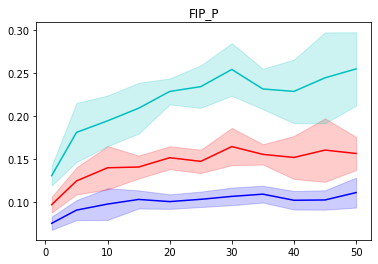

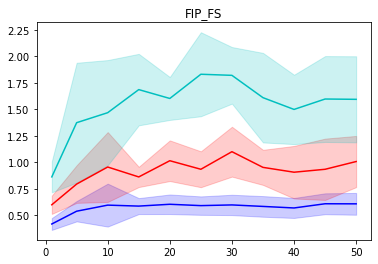

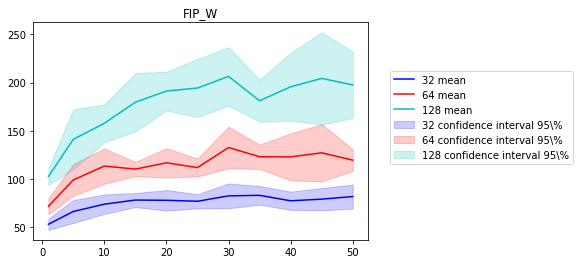

In [12]:

fig, ax1 = fig, axlist = plt.subplots(1, sharex='all', sharey='all')
fig2, ax2 = fig, axlist = plt.subplots(1, sharex='all', sharey='all')
fig3, ax3 = fig, axlist = plt.subplots(1, sharex='all', sharey='all')
axlist = [ax1, ax2, ax3]
bez_study = ['FIP_P', 'FIP_FS', 'FIP_W']
f_df = [df_confid_p, df_confid_FS, df_confid_W]

axlist[0].plot(f_df[0]['Ferritportion in %'],f_df[0]['Resolution32_mean'], label='32 mean', color='b')
axlist[0].fill_between(f_df[0]['Ferritportion in %'], f_df[0]['Resolution32_lbound'], f_df[0]['Resolution32_ubound'], color='b', alpha=.2, label='32 confidence interval 95\%')
axlist[0].plot(f_df[0]['Ferritportion in %'],f_df[0]['Resolution64_mean'], label='64 mean', color='r')
axlist[0].fill_between(f_df[0]['Ferritportion in %'], f_df[0]['Resolution64_lbound'], f_df[0]['Resolution64_ubound'], color='r', alpha=.2, label='64 confidence interval 95\%')
axlist[0].plot(f_df[0]['Ferritportion in %'],f_df[0]['Resolution128_mean'], label='128 mean', color='c')
axlist[0].fill_between(f_df[0]['Ferritportion in %'], f_df[0]['Resolution128_lbound'], f_df[0]['Resolution128_ubound'], color='c', alpha=.2, label='128 confidence interval 95\%')
#axlist[0].set_yscale('log')
axlist[0].set_title(bez_study[0])
plt.legend(bbox_to_anchor=(1.05, 0.8))

axlist[1].plot(f_df[1]['Ferritportion in %'],f_df[1]['Resolution32_mean'], label='32 mean', color='b')
axlist[1].fill_between(f_df[1]['Ferritportion in %'], f_df[1]['Resolution32_lbound'], f_df[1]['Resolution32_ubound'], color='b', alpha=.2, label='32 confidence interval 95\%')
axlist[1].plot(f_df[1]['Ferritportion in %'],f_df[1]['Resolution64_mean'], label='64 mean', color='r')
axlist[1].fill_between(f_df[1]['Ferritportion in %'], f_df[1]['Resolution64_lbound'], f_df[1]['Resolution64_ubound'], color='r', alpha=.2, label='64 confidence interval 95\%')
axlist[1].plot(f_df[1]['Ferritportion in %'],f_df[1]['Resolution128_mean'], label='128 mean', color='c')
axlist[1].fill_between(f_df[1]['Ferritportion in %'], f_df[1]['Resolution128_lbound'], f_df[1]['Resolution128_ubound'], color='c', alpha=.2, label='128 confidence interval 95\%')
#axlist[1].set_yscale('log')
axlist[1].set_title(bez_study[1])

#plt.legend(bbox_to_anchor=(1.05, 0.8))


axlist[2].plot(f_df[2]['Ferritportion in %'],f_df[2]['Resolution32_mean'], label='32 mean', color='b')
axlist[2].fill_between(f_df[2]['Ferritportion in %'], f_df[2]['Resolution32_lbound'], f_df[2]['Resolution32_ubound'], color='b', alpha=.2, label='32 confidence interval 95\%')
axlist[2].plot(f_df[2]['Ferritportion in %'],f_df[2]['Resolution64_mean'], label='64 mean', color='r')
axlist[2].fill_between(f_df[2]['Ferritportion in %'], f_df[2]['Resolution64_lbound'], f_df[2]['Resolution64_ubound'], color='r', alpha=.2, label='64 confidence interval 95\%')
axlist[2].plot(f_df[2]['Ferritportion in %'],f_df[2]['Resolution128_mean'], label='128 mean', color='c')
axlist[2].fill_between(f_df[2]['Ferritportion in %'], f_df[2]['Resolution128_lbound'], f_df[2]['Resolution128_ubound'], color='c', alpha=.2, label='128 confidence interval 95\%')
#axlist[2].set_yscale('log')
axlist[2].set_title(bez_study[2])

plt.legend(bbox_to_anchor=(1.05, 0.8))

plt.savefig(os.path.join(dir_study, 'FIPMAXES.png'), bbox_inches='tight', dpi=150, transparent=True)

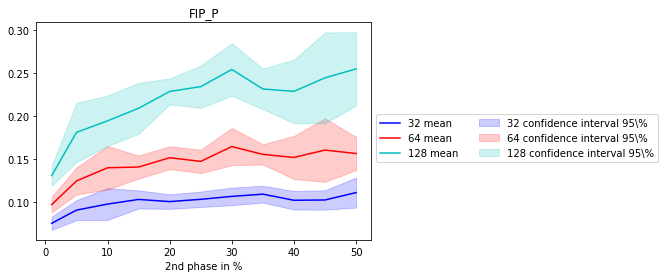

In [13]:
axlist = [ax1, ax2, ax3]
bez_study = ['FIP_P', 'FIP_FS', 'FIP_W']
f_df = [df_confid_p, df_confid_FS, df_confid_W]

plt.plot(f_df[0]['Ferritportion in %'],f_df[0]['Resolution32_mean'], label='32 mean', color='b')
plt.fill_between(f_df[0]['Ferritportion in %'], f_df[0]['Resolution32_lbound'], f_df[0]['Resolution32_ubound'], color='b', alpha=.2, label='32 confidence interval 95\%')
plt.plot(f_df[0]['Ferritportion in %'],f_df[0]['Resolution64_mean'], label='64 mean', color='r')
plt.fill_between(f_df[0]['Ferritportion in %'], f_df[0]['Resolution64_lbound'], f_df[0]['Resolution64_ubound'], color='r', alpha=.2, label='64 confidence interval 95\%')
plt.plot(f_df[0]['Ferritportion in %'],f_df[0]['Resolution128_mean'], label='128 mean', color='c')
plt.fill_between(f_df[0]['Ferritportion in %'], f_df[0]['Resolution128_lbound'], f_df[0]['Resolution128_ubound'], color='c', alpha=.2, label='128 confidence interval 95\%')
#axlist[0].set_yscale('log')
plt.title(bez_study[0])
plt.legend(bbox_to_anchor=(1.0, 0.6), ncol=2)
plt.xlabel('2nd phase in %')

plt.savefig(os.path.join(dir_study, 'FIPMAXES.png'), bbox_inches='tight', dpi=150, transparent=True)

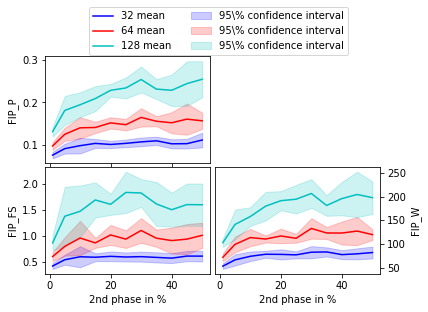

In [14]:
## 2x2 Grid of phase Ferrite
##
f_df = [df_confid_p, df_confid_FS, df_confid_W]
bez_study = ['FIP_P', 'FIP_FS', 'FIP_W']

plot1 = plt.subplot2grid((10, 10), (0, 0), rowspan=5, colspan=5)
plot2 = plt.subplot2grid((10, 10), (5, 0), rowspan=5, colspan=5)
plot3 = plt.subplot2grid((10, 10), (5, 5), rowspan=5, colspan=5)

axlist = [plot1, plot2, plot3]
for kk in range(3):
    axlist[kk].plot(f_df[kk]['Ferritportion in %'],f_df[kk]['Resolution32_mean'], label='32 mean', color='b')
    axlist[kk].fill_between(f_df[kk]['Ferritportion in %'], f_df[kk]['Resolution32_lbound'], f_df[kk]['Resolution32_ubound'], color='b', alpha=.2, label='95\% confidence interval')
    axlist[kk].plot(f_df[kk]['Ferritportion in %'],f_df[kk]['Resolution64_mean'], label='64 mean', color='r')
    axlist[kk].fill_between(f_df[kk]['Ferritportion in %'], f_df[kk]['Resolution64_lbound'], f_df[kk]['Resolution64_ubound'], color='r', alpha=.2, label='95\% confidence interval')
    axlist[kk].plot(f_df[kk]['Ferritportion in %'],f_df[kk]['Resolution128_mean'], label='128 mean', color='c')
    axlist[kk].fill_between(f_df[kk]['Ferritportion in %'], f_df[kk]['Resolution128_lbound'], f_df[kk]['Resolution128_ubound'], color='c', alpha=.2, label='95\% confidence interval')
    #axlist[0].set_yscale('log')
    #axlist[kk].set_title(bez_study[kk])
    axlist[kk].set_ylabel(bez_study[kk])

plot1.set_xticklabels('')
plot3.yaxis.tick_right()

plot2.set_xlabel('2nd phase in %')
plot3.set_xlabel('2nd phase in %')
plot3.yaxis.set_label_position('right')


plt.legend(loc = "lower left", bbox_to_anchor=(-0.8, 2), ncol=2)

tikzplotlib.save(gesamtbildtex_fmax)
fig.savefig(gesamtbildpng_fmax, bbox_inches='tight', dpi=150, transparent=True)
plt.show()

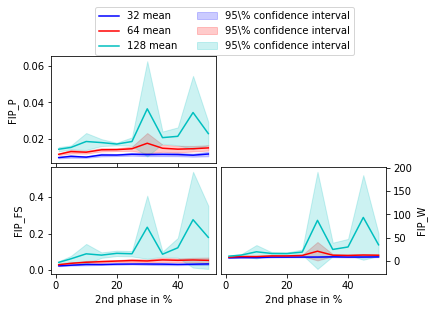

In [15]:
##2x2 grid of plots for Martensite. 
## volume fraction of martenstite in csv is given as volumefraction of 2nd phase!!
f_df = [df_confid_p2, df_confid_FS2, df_confid_W2]
bez_study = ['FIP_P', 'FIP_FS', 'FIP_W']

plot1 = plt.subplot2grid((10, 10), (0, 0), rowspan=5, colspan=5)
plot2 = plt.subplot2grid((10, 10), (5, 0), rowspan=5, colspan=5)
plot3 = plt.subplot2grid((10, 10), (5, 5), rowspan=5, colspan=5)

axlist = [plot1, plot2, plot3]
for kk in range(3):
    axlist[kk].plot(f_df[kk]['Ferritportion in %'],f_df[kk]['Resolution32_mean'], label='32 mean', color='b')
    axlist[kk].fill_between(f_df[kk]['Ferritportion in %'], f_df[kk]['Resolution32_lbound'], f_df[kk]['Resolution32_ubound'], color='b', alpha=.2, label='95\% confidence interval')
    axlist[kk].plot(f_df[kk]['Ferritportion in %'],f_df[kk]['Resolution64_mean'], label='64 mean', color='r')
    axlist[kk].fill_between(f_df[kk]['Ferritportion in %'], f_df[kk]['Resolution64_lbound'], f_df[kk]['Resolution64_ubound'], color='r', alpha=.2, label='95\% confidence interval')
    axlist[kk].plot(f_df[kk]['Ferritportion in %'],f_df[kk]['Resolution128_mean'], label='128 mean', color='c')
    axlist[kk].fill_between(f_df[kk]['Ferritportion in %'], f_df[kk]['Resolution128_lbound'], f_df[kk]['Resolution128_ubound'], color='c', alpha=.2, label='95\% confidence interval')
    #axlist[0].set_yscale('log')
    #axlist[kk].set_title(bez_study[kk])
    axlist[kk].set_ylabel(bez_study[kk])

plot1.set_xticklabels('')
plot3.yaxis.tick_right()

plot2.set_xlabel('2nd phase in %')
plot3.set_xlabel('2nd phase in %')
plot3.yaxis.set_label_position('right')


plt.legend(loc = "lower left", bbox_to_anchor=(-0.8, 2), ncol=2)

tikzplotlib.save(gesamtbildtex_fmax)
fig.savefig(gesamtbildpng_fmax, bbox_inches='tight', dpi=150, transparent=True)
plt.show()

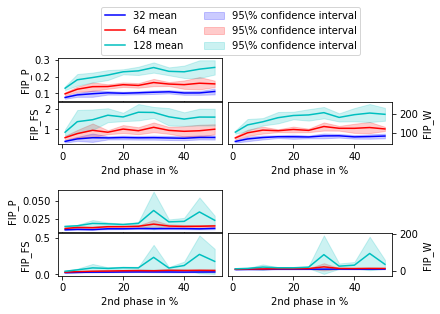

In [16]:
f_df = [df_confid_p, df_confid_FS, df_confid_W, df_confid_p2, df_confid_FS2, df_confid_W2]
bez_study = ['FIP_P', 'FIP_FS', 'FIP_W', 'FIP_P', 'FIP_FS', 'FIP_W']

plot1 = plt.subplot2grid((25, 10), (0, 0), rowspan=5, colspan=5)
plot2 = plt.subplot2grid((25, 10), (5, 0), rowspan=5, colspan=5)
plot3 = plt.subplot2grid((25, 10), (5, 5), rowspan=5, colspan=5)

plot4_m = plt.subplot2grid((25, 10), (15, 0), rowspan=5, colspan=5)
plot5_m = plt.subplot2grid((25, 10), (20, 0), rowspan=5, colspan=5)
plot6_m = plt.subplot2grid((25, 10), (20, 5), rowspan=5, colspan=5)

axlist = [plot1, plot2, plot3, plot4_m, plot5_m, plot6_m]
for kk in range(6):
    axlist[kk].plot(f_df[kk]['Ferritportion in %'],f_df[kk]['Resolution32_mean'], label='32 mean', color='b')
    axlist[kk].fill_between(f_df[kk]['Ferritportion in %'], f_df[kk]['Resolution32_lbound'], f_df[kk]['Resolution32_ubound'], color='b', alpha=.2, label='95\% confidence interval')
    axlist[kk].plot(f_df[kk]['Ferritportion in %'],f_df[kk]['Resolution64_mean'], label='64 mean', color='r')
    axlist[kk].fill_between(f_df[kk]['Ferritportion in %'], f_df[kk]['Resolution64_lbound'], f_df[kk]['Resolution64_ubound'], color='r', alpha=.2, label='95\% confidence interval')
    axlist[kk].plot(f_df[kk]['Ferritportion in %'],f_df[kk]['Resolution128_mean'], label='128 mean', color='c')
    axlist[kk].fill_between(f_df[kk]['Ferritportion in %'], f_df[kk]['Resolution128_lbound'], f_df[kk]['Resolution128_ubound'], color='c', alpha=.2, label='95\% confidence interval')
    #axlist[0].set_yscale('log')
    #axlist[kk].set_title(bez_study[kk])
    axlist[kk].set_ylabel(bez_study[kk])

plot1.set_xticklabels('')
plot4_m.set_xticklabels('')
plot3.yaxis.tick_right()
plot6_m.yaxis.tick_right()

plot2.set_xlabel('2nd phase in %')
plot3.set_xlabel('2nd phase in %')

plot5_m.set_xlabel('2nd phase in %')
plot6_m.set_xlabel('2nd phase in %')

plot3.yaxis.set_label_position('right')
plot6_m.yaxis.set_label_position('right')


plt.legend(loc = "lower left", bbox_to_anchor=(-0.8, 5.1), ncol=2)

tikzplotlib.save(gesamtbildtex_fmax)
fig.savefig(gesamtbildpng_fmax, bbox_inches='tight', dpi=150, transparent=True)
plt.show()

In [17]:
cl = [32,64,128,32,64,128]
for num, cols in enumerate(range(1,4, 1)):
    newinf = []
    newinf.append(cl[num])
    ll_vl = []
    for index, row in rt_df.iterrows():
        a = row.iat[cols].strip('][').split(', ')
        [ll_vl.append(float(gg)) for gg in a ]
    
    arr = np.array(ll_vl)
    mean = np.mean(arr)
    l_bound, u_bound = st.t.interval(0.95, len(arr)-1, loc=mean, scale=st.sem(arr))
    newinf.append(mean)
    newinf.append(l_bound)
    newinf.append(u_bound)
    
    ll_vl = []
    for index, row in rt_df.iterrows():
        a = row.iat[cols+3].strip('][').split(', ')
        [ll_vl.append(float(gg)) for gg in a ]
    
    arr = np.array(ll_vl)
    mean = np.mean(arr)
    l_bound, u_bound = st.t.interval(0.95, len(arr)-1, loc=mean, scale=st.sem(arr))
    newinf.append(mean)
    newinf.append(l_bound)
    newinf.append(u_bound)
    
    a_series = pd.Series(newinf, index = df_confid_rtime.columns)
    df_confid_rtime = df_confid_rtime.append(a_series, ignore_index=True)

In [18]:
df_confid_rtime

,Resol,rtime_mean,rtime_lbound,rtime_ubound,Mib_mean,Mib_lbound,Mib_ubound
0,32.0,743.452182,689.952982,796.951382,113.481818,113.380289,113.583347
1,64.0,4276.228727,4135.515706,4416.941748,609.054545,608.737054,609.372036
2,128.0,30606.300273,30105.433753,31107.166792,4542.545455,4542.209123,4542.881786


In [19]:
from scipy.interpolate import make_interp_spline, BSpline
nsplinepoints  = 300
# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(df_confid_rtime.iloc[0].iat[0], df_confid_rtime.iloc[2].iat[0], nsplinepoints) 

spl = make_interp_spline(df_confid_rtime.iloc[:,0],df_confid_rtime.iloc[:,1], k=2)  # type: BSpline
power_smooth = spl(xnew)
#plt.plot(xnew, power_smooth)
#plt.show()

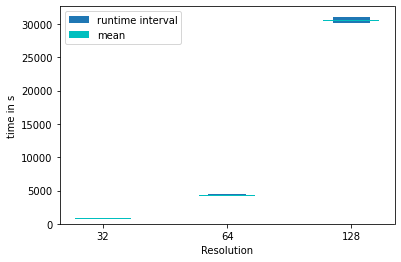

In [24]:
barWidth = 0.3

fig, ax = plt.subplots()
 
# The x position of bars
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]

d_ml = (df_confid_rtime.iloc[2].iat[3]/2)*0.005

# Create blue bars
#plt.bar(r1, df_confid_rtime.iloc[:,1], width = barWidth, color = 'blue', edgecolor = 'black', yerr=(df_confid_rtime.iloc[:,1]-df_confid_rtime.iloc[:,2]), capsize=7, label='runtime')
ax.bar(['32', '64', '128'], df_confid_rtime.iloc[:,3]-df_confid_rtime.iloc[:,2], barWidth, bottom=df_confid_rtime.iloc[:,2],
       label='runtime interval')
ax.bar(['32', '64', '128'], df_confid_rtime.iloc[:,2], barWidth, color='w')
ax.bar(['32', '64', '128'], (df_confid_rtime.iloc[:,1]+d_ml)-(df_confid_rtime.iloc[:,1]-d_ml), barWidth*1.5, color='c', bottom=df_confid_rtime.iloc[:,1]-d_ml, label='mean')
# Create cyan bars
#plt.bar(r2, df_confid_rtime.iloc[:,4], width = barWidth, color = 'green', edgecolor = 'black', yerr=(df_confid_rtime.iloc[:,4]-df_confid_rtime.iloc[:,5]), capsize=7, label='sorgho')
#ax.plot(xnew, power_smooth)
# general layout
#plt.xticks([r + barWidth for r in range(3)], ['32', '64', '128'])
#plt.xticks([r for r in range(3)], ['32', '64', '128'])
plt.ylabel('time in s')
plt.xlabel('Resolution')
plt.legend()
 
# Show graphic
tikzplotlib.save(os.path.join(dir_study, 'runtimestudy_without_astimate.tex'))
#plt.show()
#plt.yscale('log')

In [21]:
lvalslist = []
uvalslist = []
mvalslist = []
nvalslist = []
rvalslist = []
d_ml = (df_confid_rtime.iloc[2].iat[3]/2)*0.005
for kk in range(nsplinepoints):
    if kk == 0:
        lvalslist.append(df_confid_rtime.iloc[0].iat[2])
    elif kk == 149:
        lvalslist.append(df_confid_rtime.iloc[1].iat[2])
    elif kk == 299:
        lvalslist.append(df_confid_rtime.iloc[2].iat[2])
    else:
        lvalslist.append(0)
        
for kk in range(nsplinepoints):
    if kk == 0:
        uvalslist.append(df_confid_rtime.iloc[0].iat[3]-df_confid_rtime.iloc[0].iat[2])
    elif kk == 149:
        uvalslist.append(df_confid_rtime.iloc[1].iat[3]-df_confid_rtime.iloc[1].iat[2])
    elif kk == 299:
        uvalslist.append(df_confid_rtime.iloc[2].iat[3]-df_confid_rtime.iloc[2].iat[2])
    else:
        uvalslist.append(0)

for kk in range(nsplinepoints):
    if kk == 0:
        mvalslist.append(df_confid_rtime.iloc[0].iat[1])
    elif kk == 149:
        mvalslist.append(df_confid_rtime.iloc[1].iat[1])
    elif kk == 299:
        mvalslist.append(df_confid_rtime.iloc[2].iat[1])
    else:
        mvalslist.append(0)
        
for kk in range(nsplinepoints):
    if kk == 0:
        rvalslist.append(df_confid_rtime.iloc[0].iat[0])
        nvalslist.append(d_ml*2)
    elif kk == 149:
        rvalslist.append(df_confid_rtime.iloc[1].iat[0])
        nvalslist.append(d_ml*2)
    elif kk == 299:
        rvalslist.append(df_confid_rtime.iloc[2].iat[0])
        nvalslist.append(d_ml*2)
    else:
        rvalslist.append(rvalslist[len(rvalslist)-1])
        nvalslist.append(0)

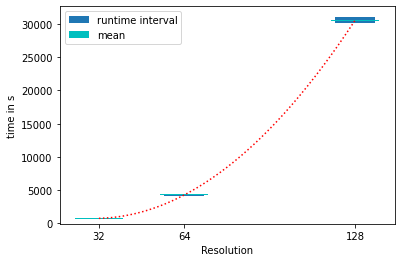

In [25]:
barWidth = nsplinepoints*0.05

fig, ax = plt.subplots()
 
# The x position of bars
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]



# Create blue bars
#plt.bar(r1, df_confid_rtime.iloc[:,1], width = barWidth, color = 'blue', edgecolor = 'black', yerr=(df_confid_rtime.iloc[:,1]-df_confid_rtime.iloc[:,2]), capsize=7, label='runtime')
ax.bar(rvalslist, uvalslist, barWidth, bottom=lvalslist,
       label='runtime interval')
ax.bar(rvalslist, lvalslist, barWidth, color='w')
ax.bar(rvalslist, nvalslist, barWidth*1.2, color='c', bottom=mvalslist-d_ml, label='mean')
# Create cyan bars
#plt.bar(r2, df_confid_rtime.iloc[:,4], width = barWidth, color = 'green', edgecolor = 'black', yerr=(df_confid_rtime.iloc[:,4]-df_confid_rtime.iloc[:,5]), capsize=7, label='sorgho')
ax.plot(xnew, power_smooth, color='r', linestyle='dotted')
# general layout
#plt.xticks([r + barWidth for r in range(3)], ['32', '64', '128'])
plt.xticks([32,64,128])#, ['32', '64', '128'])
plt.ylabel('time in s')
plt.xlabel('Resolution')
plt.legend()
 
# Show graphic
#plt.show()
#plt.xscale('log')

tikzplotlib.save(os.path.join(dir_study, 'runtimestudy_with_astimate.tex'))
plt.savefig(os.path.join(dir_study, 'RunTime.png'), bbox_inches='tight', dpi=150, transparent=True)

In [21]:
huse = df_confid_rtime.iloc[2].iat[1]/df_confid_rtime.iloc[0].iat[1]
hudr = df_confid_rtime.iloc[2].iat[1]/df_confid_rtime.iloc[1].iat[1]
print('128 braucht \n{:0.3f} mal länger als 64 \n und \n{:0.3f} mal länger als 32'.format(hudr,huse))

128 braucht 
7.157 mal länger als 64 
 und 
41.168 mal länger als 32


In [22]:
sedr = df_confid_rtime.iloc[1].iat[1]/df_confid_rtime.iloc[0].iat[1]
print('64 braucht \n{:0.3f} mal länger als 32'.format(float(sedr)))

64 braucht 
5.752 mal länger als 32
